#  AirBnB IronHack - Predict AirBnB price in Amsterdam

In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as plt
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as cm
sns.set(rc={"figure.figsize": (12.,6.)})
from src.cleaning4 import *

In [2]:
data=pd.read_csv('Data/train.csv')
data.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/2842228,20211205213126,2021-12-06,Your little appartment on wheels,A waggon luxurous designed as a hotel room on ...,"Waterland is a beautiful countryside area, wit...",https://a0.muscache.com/pictures/cc2aa51a-3c11...,3040748,https://www.airbnb.com/users/show/3040748,Henk,2012-07-24,"Amsterdam, North Holland, The Netherlands","Living in the countryside, just near Amsterdam...",within a few hours,100%,75%,f,https://a0.muscache.com/im/users/3040748/profi...,https://a0.muscache.com/im/users/3040748/profi...,NaN,13,13,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Noord-Oost,NaN,52.39508,4.99186,Private room in farm stay,Private room,3,NaN,1.5 shared baths,1.0,NaN,"[""First aid kit"", ""Free parking on premises"", ...",87.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,0,0,0,249,2021-12-06,81,0,0,2014-08-03,2019-06-15,4.62,4.56,4.29,4.57,4.75,4.69,4.49,0363 2A6D 7C09 877D 715F,f,10,0,10,0,0.91
1,1,https://www.airbnb.com/rooms/41236669,20211205213126,2021-12-06,Spacious 4p city center apartment (2 bedrooms!),Are you looking for a perfect place to stay in...,Our home is located in the Plantagebuurt. A un...,https://a0.muscache.com/pictures/5f33bf5a-399c...,34773624,https://www.airbnb.com/users/show/34773624,Julie,2015-06-01,"Amsterdam, Noord-Holland, Netherlands",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/a5da3...,https://a0.muscache.com/im/pictures/user/a5da3...,Weesperbuurt en Plantage,0,0,"['email', 'phone', 'reviews']",t,f,"Amsterdam, Noord-Holland, Netherlands",Centrum-Oost,NaN,52.36371,4.90745,Entire rental unit,Entire home/apt,4,NaN,1 bath,2.0,2.0,"[""Hot water kettle"", ""Pocket wifi"", ""Stove"", ""...",250.0,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,3,3,3,3,2021-12-06,9,4,1,2020-01-26,2021-09-05,5.00,5.00,5.00,4.89,5.00,5.00,4.89,0363 BD0E 9934 ACCA D3DE,f,1,1,0,0,0.40


*Firstly we drop those columns that, without any analysis, we know we wont wont use them to predict the price*

In [3]:
data=data.drop(columns=['listing_url','scrape_id','last_scraped','name','picture_url','host_url','host_name',
                        'host_thumbnail_url',
                        'host_picture_url','license','host_about','description','host_location','host_neighbourhood',
                       'neighbourhood_group_cleansed','bathrooms','calendar_updated','calendar_last_scraped',
                       'host_verifications','host_id','host_since','host_response_time','host_response_rate',
                       'host_acceptance_rate','first_review','last_review'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4167 non-null   int64  
 1   neighborhood_overview                         3004 non-null   object 
 2   host_is_superhost                             4167 non-null   object 
 3   host_listings_count                           4167 non-null   int64  
 4   host_total_listings_count                     4167 non-null   int64  
 5   host_has_profile_pic                          4167 non-null   object 
 6   host_identity_verified                        4167 non-null   object 
 7   neighbourhood                                 3004 non-null   object 
 8   neighbourhood_cleansed                        4167 non-null   object 
 9   latitude                                      4167 non-null   f

In [5]:
data.shape

(4167, 48)

*We need to check the proportion of nan values*

In [6]:
pd.options.display.min_rows = 74
nan=((data.isnull().sum())/len(data))*100
nan.sort_values(ascending = False)[:25]

neighborhood_overview                           27.909767
neighbourhood                                   27.909767
review_scores_value                              9.239261
review_scores_location                           9.239261
review_scores_communication                      9.239261
review_scores_checkin                            9.239261
review_scores_cleanliness                        9.239261
review_scores_accuracy                           9.239261
reviews_per_month                                9.047276
review_scores_rating                             9.047276
bedrooms                                         6.071514
beds                                             4.175666
bathrooms_text                                   0.191985
maximum_nights_avg_ntm                           0.023998
minimum_nights_avg_ntm                           0.023998
minimum_minimum_nights                           0.023998
minimum_maximum_nights                           0.023998
maximum_minimu

*We drop more columns due they contains the same information than others with less nan values.*

In [7]:
data=data.drop(columns=['neighbourhood','neighborhood_overview'])

In [8]:
data.shape

(4167, 46)

*Now, before droping more columns we analyzed the correlation between them in different groups. We change to numeric those we need to compare.*

In [9]:
data[['host_total_listings_count', 'maximum_nights','maximum_maximum_nights',
    'minimum_nights_avg_ntm','number_of_reviews','review_scores_accuracy',
    'review_scores_communication','review_scores_value']] = data[['host_total_listings_count', 
    'maximum_nights','maximum_maximum_nights',
    'minimum_nights_avg_ntm','number_of_reviews','review_scores_accuracy',
    'review_scores_communication','review_scores_value']].apply(pd.to_numeric,errors='coerce',axis=1)

#### Host_listings_count

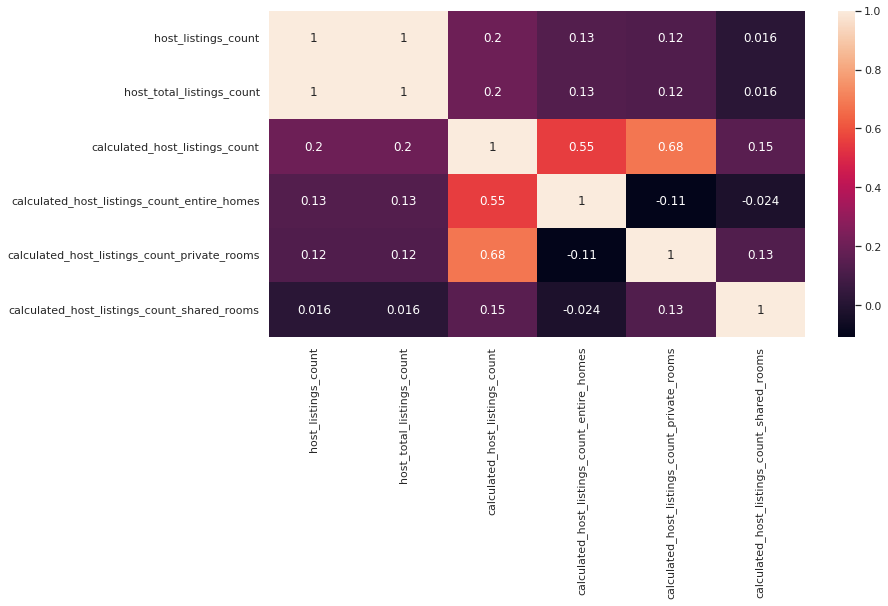

In [10]:
corrMatrix=data[['host_listings_count','host_total_listings_count', 'calculated_host_listings_count',
                 'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                 'calculated_host_listings_count_shared_rooms']].corr()
sns.heatmap(corrMatrix, annot=True);

In [11]:
compare= data[["host_total_listings_count", "calculated_host_listings_count",'calculated_host_listings_count_entire_homes',
                'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']]
compare.sample(5)

,host_total_listings_count,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
2037,2.0,1,0,1,0
24,2.0,2,1,1,0
3849,0.0,1,1,0,0
3759,2.0,2,0,2,0
3961,2.0,2,0,2,0


In [12]:
difference=print(sum((data.host_listings_count == data.calculated_host_listings_count) == False))
difference

1524


*After analysing this corrMatrix, we drop all the columns except 'calculated_host_listings_count' due its the sum of the other three calculated columns (regarding host_listings) and also because it reflects the same information as host_total_listings_count in about 65% of the rows. 
The only difference is that it is data obtained from scraping, while the other source is Airbnb.*

In [13]:
data1=data.drop(columns=['host_total_listings_count','calculated_host_listings_count_entire_homes',
                        'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
                         'host_listings_count'])

#### Minimum & Maximum nights

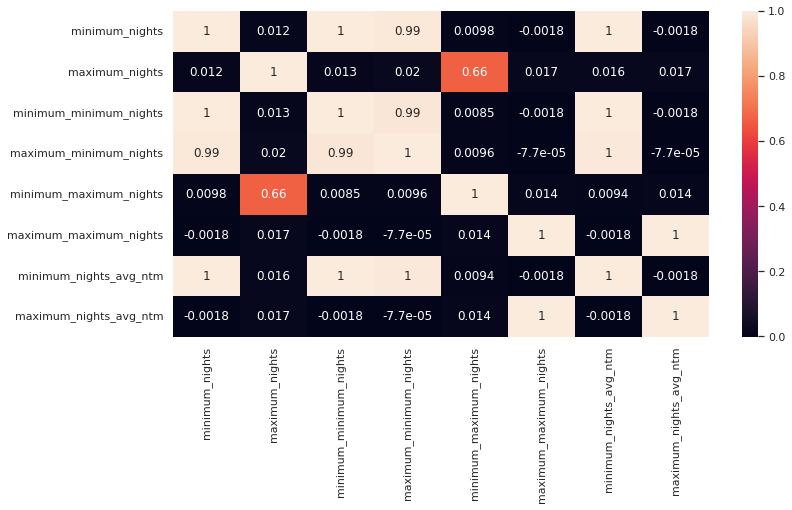

In [14]:
corrMatrix=data1[['minimum_nights', 'maximum_nights', 'minimum_minimum_nights','maximum_minimum_nights',
                 'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                 'maximum_nights_avg_ntm']].corr();
sns.heatmap(corrMatrix, annot=True);

In [15]:
sum((data1.minimum_nights == data1.minimum_minimum_nights) == False)

315

*After analysing this corrMatrix, we drop all the columns except 'minimum_nights' & 'maximum_nights' due to their correlation with the others*.

In [16]:
data2=data1.drop(columns=['minimum_minimum_nights','maximum_minimum_nights',
                 'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                 'maximum_nights_avg_ntm'])

#### Availability

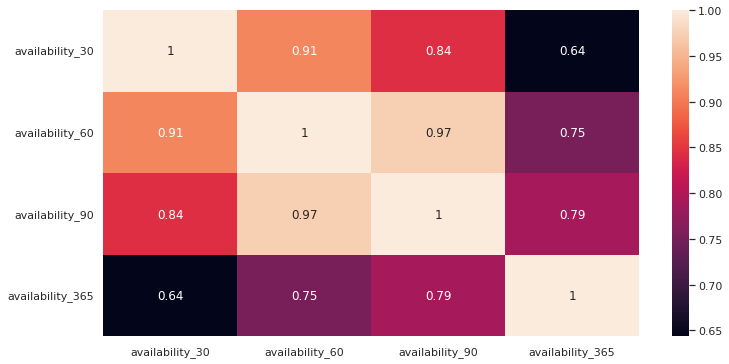

In [17]:
corrMatrix = data2[['availability_30', 'availability_60', 'availability_90','availability_365']].corr()
sns.heatmap(corrMatrix, annot=True);

In [18]:
sum((data2.availability_90 == data2.availability_60) == False)

1968

*After analysing this corrMatrix, we drop all the columns except 'availability_90' due its the one with the highest correlation with the others*.

In [19]:
data3=data2.drop(columns=['availability_30', 'availability_60','availability_365'])

#### Reviews

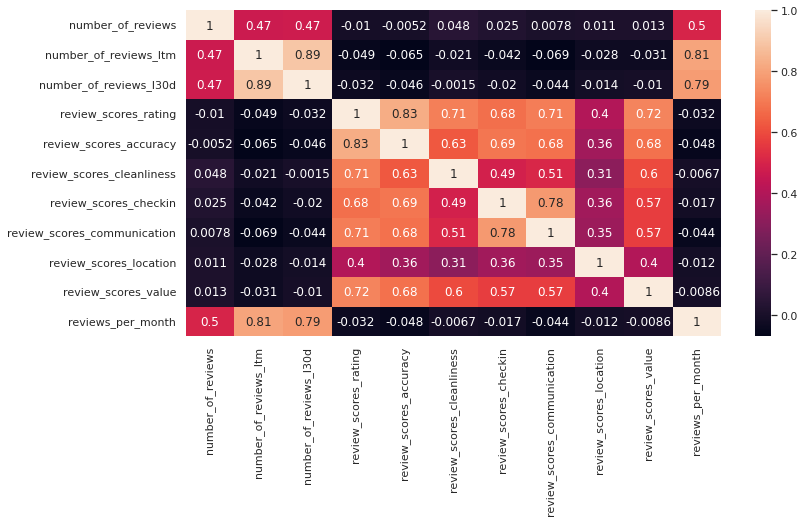

In [20]:
corrMatrix=data3[['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d','review_scores_rating',
                 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                 'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']].corr();
sns.heatmap(corrMatrix, annot=True);

*We drop all the columns except 'number_of_reviews','review_scores_rating', due high correlation with the others*

In [21]:
datas=data3.drop(columns=['number_of_reviews_ltm', 'number_of_reviews_l30d','review_scores_accuracy',
                          'review_scores_cleanliness',
                          'review_scores_checkin','review_scores_communication','review_scores_location',
                          'review_scores_value','reviews_per_month'])

In [22]:
datas.shape

(4167, 23)

*We check again nan values and total correlation*

In [23]:
pd.options.display.min_rows = 82
nan1=(datas.isnull().sum()/len(datas))*100
nan1.sort_values(ascending = False)[:10]

review_scores_rating    9.047276
bedrooms                6.071514
beds                    4.175666
bathrooms_text          0.191985
instant_bookable        0.000000
number_of_reviews       0.000000
availability_90         0.000000
has_availability        0.000000
maximum_nights          0.000000
minimum_nights          0.000000
dtype: float64

In [24]:
corr_total=datas.corr().T
corr_total.sum()

id                                0.953261
latitude                          1.153239
longitude                         1.224063
accommodates                      2.872329
bedrooms                          2.530179
beds                              2.976828
price                             1.947018
minimum_nights                    0.982887
maximum_nights                    1.149473
availability_90                   1.214938
number_of_reviews                 0.678524
review_scores_rating              0.592142
calculated_host_listings_count    1.014438
dtype: float64

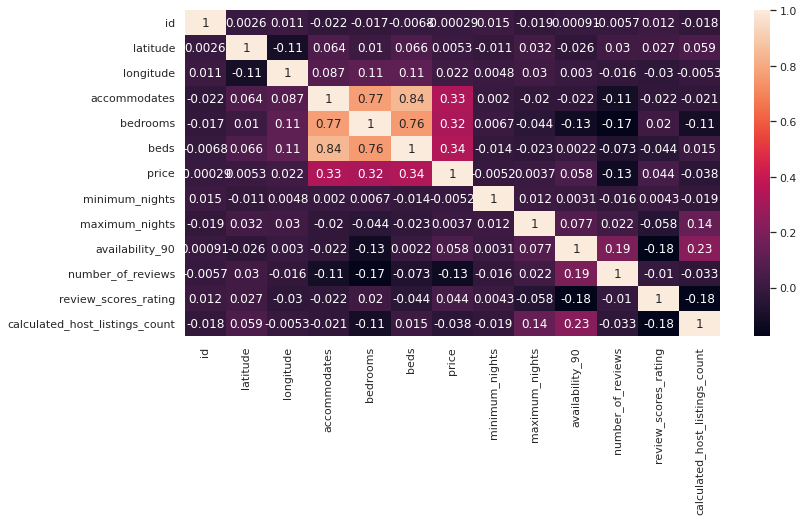

In [25]:
corrMatrix = datas.corr()
sns.heatmap(corrMatrix,annot=True)
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_context("poster")
sns.set_style("whitegrid")
plt.show();

*Regarding latitude and longitude we drop them and create a different dataframe to use later. We also drop beds due correlation with accomodates*

In [26]:
location=datas[['id','latitude','longitude']]

In [27]:
dt=datas.drop(columns=['latitude','longitude','beds'])

In [28]:
dt.isnull().sum()

id                                  0
host_is_superhost                   0
host_has_profile_pic                0
host_identity_verified              0
neighbourhood_cleansed              0
property_type                       0
room_type                           0
accommodates                        0
bathrooms_text                      8
bedrooms                          253
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
has_availability                    0
availability_90                     0
number_of_reviews                   0
review_scores_rating              377
instant_bookable                    0
calculated_host_listings_count      0
dtype: int64

*Checking whether boolean and categorical features contain sufficient numbers of instances in each category to make them worth including*

In [29]:
dt.replace({'f': 0, 't': 1}, inplace=True)

*We also need to change to numeric several columns to plot the histograms.*

In [30]:
dt[['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable','bedrooms',
    'has_availability']] = dt[['host_is_superhost',
    'host_has_profile_pic','host_identity_verified','instant_bookable','bedrooms',
    'has_availability']].apply(pd.to_numeric,errors='coerce',axis=1)

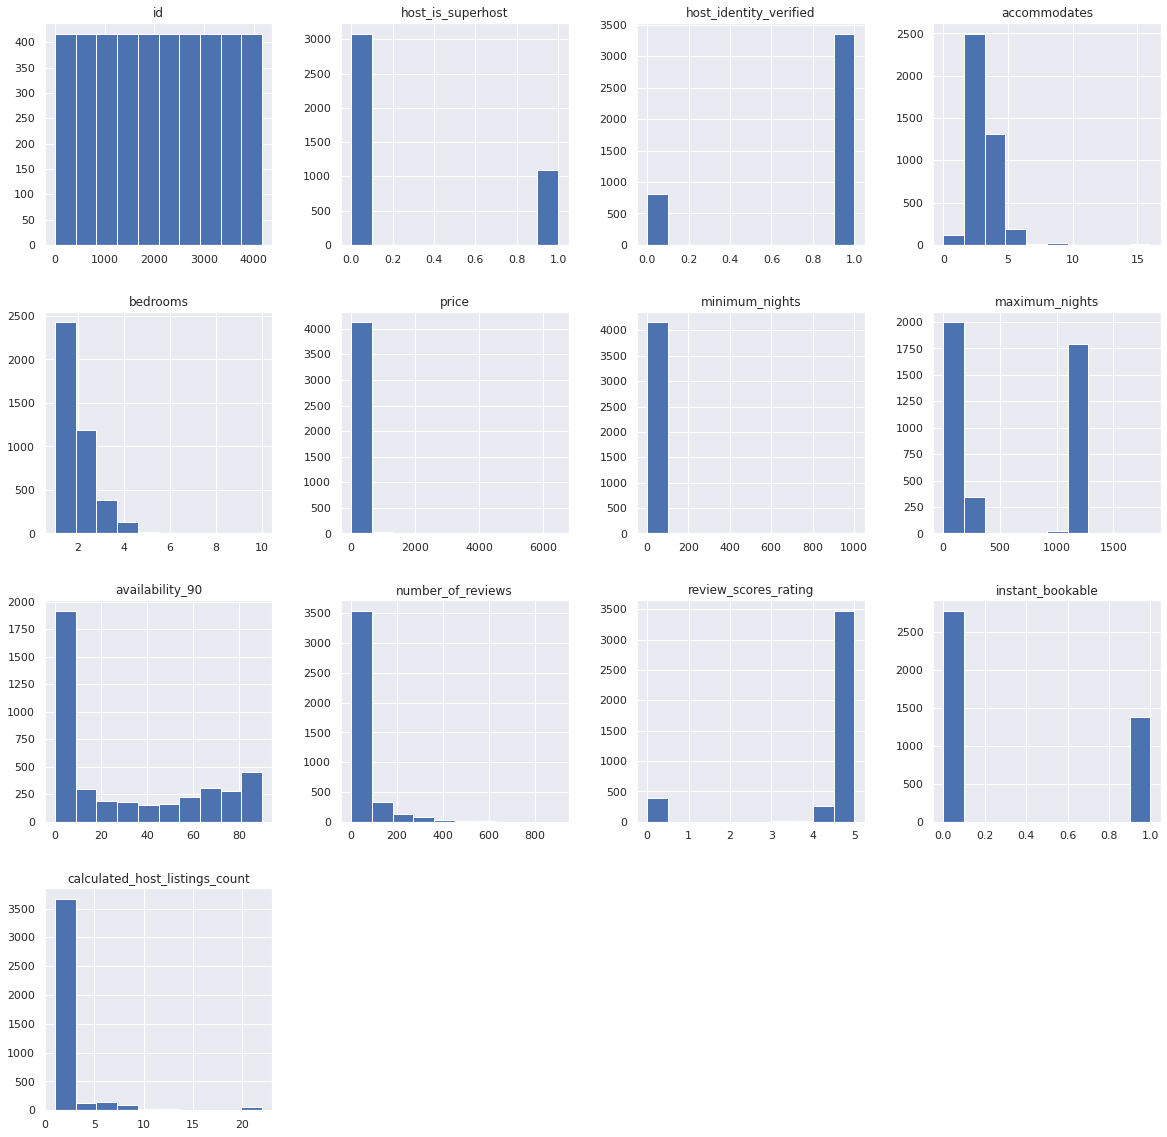

In [94]:
dt.hist(figsize=(20,20));
sns.set(rc={"figure.figsize": (20.,20.)})
plt.xticks(size = 0)
plt.yticks(size = 0);

*We can conculde that several columns only contain one category so they can be dropped.*

In [32]:
dt=dt.drop(columns=['has_availability','host_has_profile_pic'])

In [33]:
dt.shape

(4167, 18)

*We check again the sum of nan values to replace them where its convenient*

In [34]:
pd.options.display.min_rows = 82
na=(dt.isnull().sum())
na.sort_values(ascending = False)[:8]

review_scores_rating    377
bedrooms                253
bathrooms_text            8
id                        0
price                     0
instant_bookable          0
number_of_reviews         0
availability_90           0
dtype: int64

*We fill with'0' the rows with nan in the reviews columns.*

In [35]:
dt[['review_scores_rating']]=dt[['review_scores_rating']].fillna(value=0)

*We will replace the nan values in the bedrooms columns with the mean.*

In [36]:
dt[['bedrooms']]=dt[['bedrooms']].fillna(value=round(dt.bedrooms.mean()))

In [37]:
pd.options.display.min_rows = 82
na=(dt.isnull().sum())
na.sort_values(ascending = False)

bathrooms_text                    8
id                                0
price                             0
instant_bookable                  0
review_scores_rating              0
number_of_reviews                 0
availability_90                   0
maximum_nights                    0
minimum_nights                    0
amenities                         0
host_is_superhost                 0
bedrooms                          0
accommodates                      0
room_type                         0
property_type                     0
neighbourhood_cleansed            0
host_identity_verified            0
calculated_host_listings_count    0
dtype: int64

*We clean property type and bathrooms_text columns*

In [38]:
dt['property_type']=dt['property_type'].apply(room)

In [39]:
dt['bathrooms_text']=dt['bathrooms_text'].apply(limpieza2)
dt.head(2)

,id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,amenities,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count
0,0,0.0,1.0,Noord-Oost,house,Private room,3,1.5,1.0,"[""First aid kit"", ""Free parking on premises"", ...",87.0,2,1125.0,0,81.0,4.62,0.0,10
1,1,0.0,0.0,Centrum-Oost,house,Entire home/apt,4,1,2.0,"[""Hot water kettle"", ""Pocket wifi"", ""Stove"", ""...",250.0,2,1125.0,3,9.0,5.00,0.0,1


In [40]:
dt.shape

(4167, 18)

*We convert several columns from float to integer*

In [41]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4167 non-null   int64  
 1   host_is_superhost               4167 non-null   float64
 2   host_identity_verified          4167 non-null   float64
 3   neighbourhood_cleansed          4167 non-null   object 
 4   property_type                   4167 non-null   object 
 5   room_type                       4167 non-null   object 
 6   accommodates                    4167 non-null   int64  
 7   bathrooms_text                  4167 non-null   object 
 8   bedrooms                        4167 non-null   float64
 9   amenities                       4167 non-null   object 
 10  price                           4167 non-null   float64
 11  minimum_nights                  4167 non-null   int64  
 12  maximum_nights                  41

In [42]:
dt= dt.astype({'host_is_superhost':'int','host_identity_verified':'int','bedrooms':'int',
              'maximum_nights':'int','number_of_reviews':'int','instant_bookable':'int'}) 

*For now, we will also drop the amenities column*

In [43]:
dt=dt.drop(columns='amenities')

In [44]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4167 non-null   int64  
 1   host_is_superhost               4167 non-null   int64  
 2   host_identity_verified          4167 non-null   int64  
 3   neighbourhood_cleansed          4167 non-null   object 
 4   property_type                   4167 non-null   object 
 5   room_type                       4167 non-null   object 
 6   accommodates                    4167 non-null   int64  
 7   bathrooms_text                  4167 non-null   object 
 8   bedrooms                        4167 non-null   int64  
 9   price                           4167 non-null   float64
 10  minimum_nights                  4167 non-null   int64  
 11  maximum_nights                  4167 non-null   int64  
 12  availability_90                 41

##### OUTLIERS

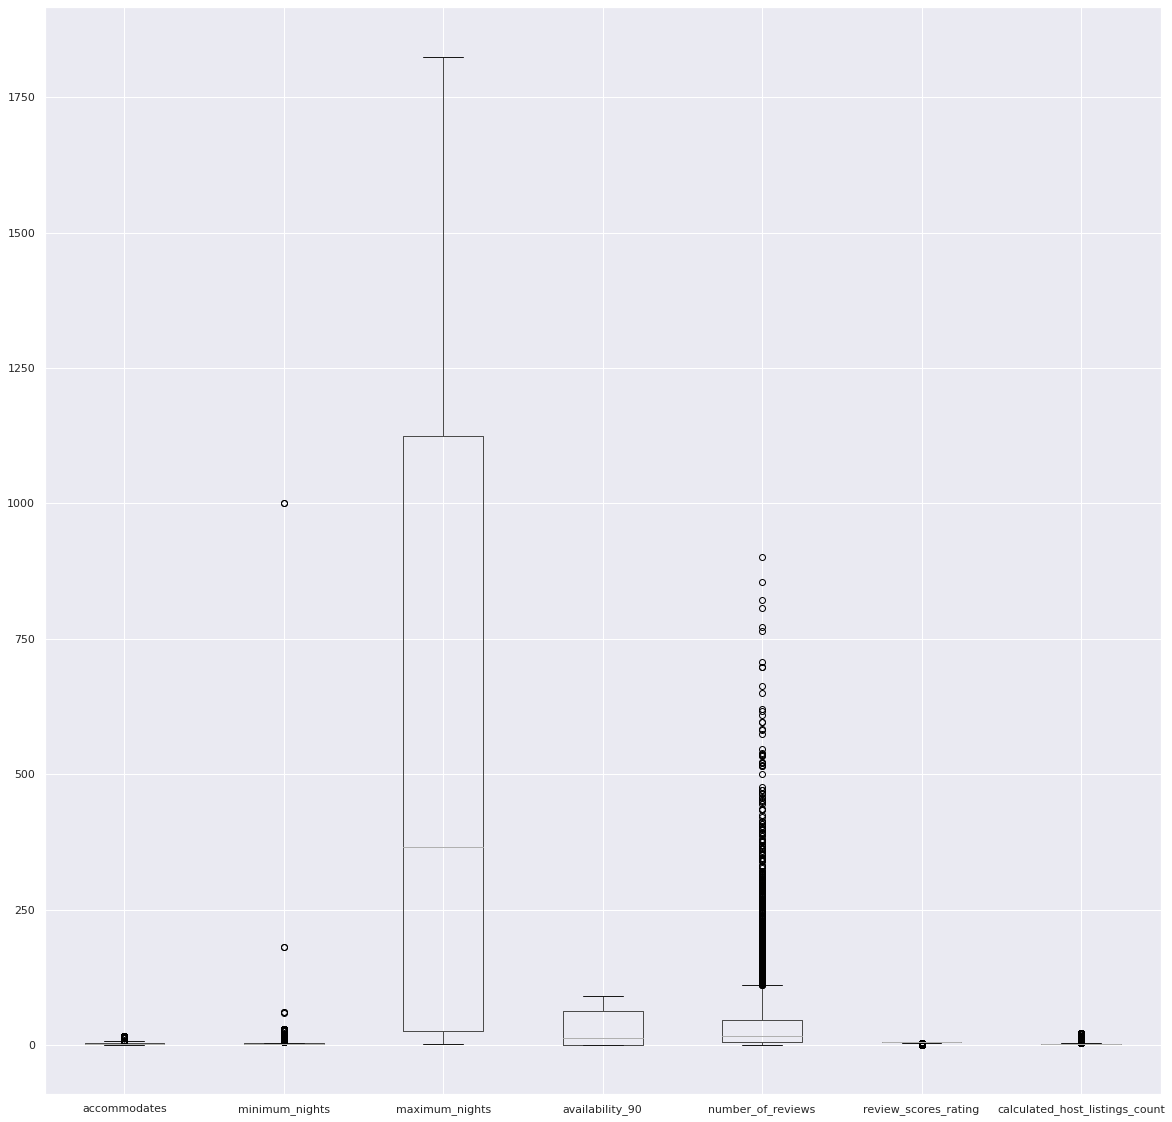

In [45]:
boxplot = dt.boxplot(column=['accommodates','minimum_nights','maximum_nights','availability_90','number_of_reviews','review_scores_rating',
                                 'calculated_host_listings_count']) 

In [46]:
dt.number_of_reviews.median()

17.0

In [47]:
dt.number_of_reviews.mean()

48.94576433885289

*Finally,we convert the object columns with 'get dummies'*

In [48]:
final=pd.get_dummies(data=dt,columns=['neighbourhood_cleansed','property_type','room_type','bathrooms_text'], drop_first=True)
final.head(1)

,id,host_is_superhost,host_identity_verified,accommodates,bedrooms,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,neighbourhood_cleansed_Bijlmer-Oost,neighbourhood_cleansed_Bos en Lommer,neighbourhood_cleansed_Buitenveldert - Zuidas,neighbourhood_cleansed_Centrum-Oost,neighbourhood_cleansed_Centrum-West,neighbourhood_cleansed_De Aker - Nieuw Sloten,neighbourhood_cleansed_De Baarsjes - Oud-West,neighbourhood_cleansed_De Pijp - Rivierenbuurt,neighbourhood_cleansed_Gaasperdam - Driemond,neighbourhood_cleansed_Geuzenveld - Slotermeer,neighbourhood_cleansed_IJburg - Zeeburgereiland,neighbourhood_cleansed_Noord-Oost,neighbourhood_cleansed_Noord-West,neighbourhood_cleansed_Oostelijk Havengebied - Indische Buurt,neighbourhood_cleansed_Osdorp,neighbourhood_cleansed_Oud-Noord,neighbourhood_cleansed_Oud-Oost,neighbourhood_cleansed_Slotervaart,neighbourhood_cleansed_Watergraafsmeer,neighbourhood_cleansed_Westerpark,neighbourhood_cleansed_Zuid,property_type_apartment,property_type_bed and breakfast,property_type_boat,property_type_condominium,property_type_hostel,property_type_hotel,property_type_house,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathrooms_text_0,bathrooms_text_1,bathrooms_text_1.5,bathrooms_text_2,bathrooms_text_2.5,bathrooms_text_3,bathrooms_text_3.5,bathrooms_text_4,bathrooms_text_4.5,bathrooms_text_5,bathrooms_text_5.5
0,0,0,1,3,1,87.0,2,1125,0,81,4.62,0,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [49]:
final.shape

(4167, 55)

## MODELING

#### Libraries

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

from sklearn.linear_model import SGDRegressor as SGDR
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from xgboost import XGBRegressor as XGBR #recomendado paper
from catboost import CatBoostRegressor as CTR
from lightgbm import LGBMRegressor as LGBMR
from sklearn.ensemble import RandomForestRegressor as RFR

### PCA

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts

In [52]:
dfnum = dt.select_dtypes(include=np.number)

In [53]:
dfnum=dfnum.drop(columns=['price'])

In [54]:
dfnum.shape

(4167, 12)

In [55]:
data=StandardScaler().fit_transform(dfnum)
data=pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.731635,-0.593703,0.491962,0.040144,-0.674469,-0.074410,1.121117,-0.905124,0.358863,0.183460,-0.704436,2.535096
1,-1.730804,-0.593703,-2.032676,0.722918,0.443920,-0.074410,1.121117,-0.813457,-0.447212,0.451934,-0.704436,-0.373424
2,-1.729973,1.684345,0.491962,-0.642630,-0.674469,-0.118947,1.121117,1.692117,-0.021784,0.303567,1.419576,5.766784
3,-1.729141,-0.593703,-2.032676,-0.642630,-0.674469,-0.074410,-0.961178,-0.905124,-0.436017,0.451934,-0.704436,-0.373424
4,-1.728310,1.684345,0.491962,-0.642630,-0.674469,-0.074410,-1.004916,1.478227,1.310479,0.218786,-0.704436,-0.373424


In [56]:
pca=PCA()
pca.fit(data)

PCA()

In [57]:
pca.explained_variance_ratio_[:10]

array([0.171928  , 0.13059446, 0.11449852, 0.08520629, 0.0846334 ,
       0.08050814, 0.0777868 , 0.06686092, 0.06300442, 0.05571481])

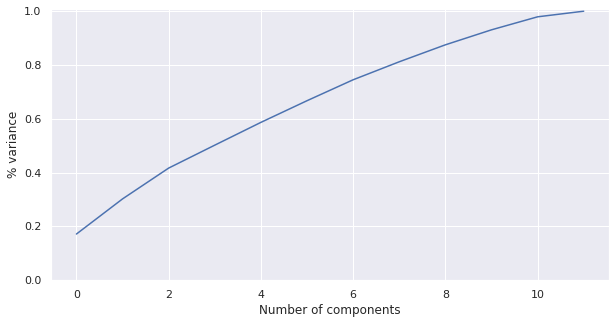

In [58]:
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('% variance')
plt.ylim([0, 1.01]);

### Recursive feature elimination

In [59]:
from sklearn.feature_selection import RFE

In [60]:
features=list(final.columns)
features.remove('price')

In [61]:
features=features
target='price'

In [62]:
X_train, X_test, y_train, y_test = tts(final[features], final[target])

In [63]:
modelo=RFR() 

In [64]:
selector=RFE(modelo, n_features_to_select=10, step=1)

In [65]:
selector.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(), n_features_to_select=10)

In [66]:
selector.ranking_  

array([ 1, 13,  7,  1,  2,  3,  1,  1,  1,  1, 16,  1, 37, 27, 39,  1,  6,
       18, 22,  9, 38, 35, 28, 30, 19, 26, 36,  8, 21, 31, 29, 23, 24, 17,
       32, 12, 25, 34,  1,  4, 15,  1, 41, 44,  5, 14, 20, 11, 10, 33, 43,
       42, 40, 45])

In [67]:
[features[i] for i,e in enumerate(selector.support_) if e] # las mas importantes

['id',
 'accommodates',
 'maximum_nights',
 'availability_90',
 'number_of_reviews',
 'review_scores_rating',
 'calculated_host_listings_count',
 'neighbourhood_cleansed_Centrum-Oost',
 'property_type_hotel',
 'room_type_Private room']

In [68]:
X_train_s, X_test_s, y_train_s, y_test_s = tts(final[[features[i] for i,e in enumerate(selector.support_) if e]], 
                                       final[target])

In [69]:
rfr=RFR(n_estimators=50) 

In [70]:

rfr.fit(X_train_s, y_train_s)
y_pred=rfr.predict(X_test_s)


In [71]:
train_score=rfr.score(X_train_s, y_train_s)  
test_score=rfr.score(X_test_s, y_test_s)
mean_sq=mean_squared_error(y_test_s, y_pred, squared=False)

print('Train R2:', train_score)
print('Test R2:', test_score)
print('rsme:', mean_sq)

Train R2: 0.8333014197064115
Test R2: 0.637448675959346
rsme: 132.83116059765408


In [72]:
from sklearn.feature_selection import SelectFromModel as SFM

In [73]:
modelo=CTR(verbose=0)

selector=SFM(modelo, threshold=0.25)
selector.fit(X_train, y_train)
modelo.fit(X_train, y_train)


In [74]:
modelo.feature_importances_[:10]

array([ 4.74189043,  0.23268576,  0.28481734, 10.72736954,  4.45703254,
        1.91242909,  3.94988296, 18.78437348,  4.51101028,  6.43749387])

In [75]:
sum(modelo.feature_importances_)

100.0

In [76]:
list(zip(features, modelo.feature_importances_))[:10]

[('id', 4.741890431693736),
 ('host_is_superhost', 0.23268576448582476),
 ('host_identity_verified', 0.2848173408901964),
 ('accommodates', 10.727369539972864),
 ('bedrooms', 4.457032541813231),
 ('minimum_nights', 1.9124290856162443),
 ('maximum_nights', 3.9498829636455683),
 ('availability_90', 18.78437348425268),
 ('number_of_reviews', 4.511010275767609),
 ('review_scores_rating', 6.437493870748766)]

### MODELS

In [77]:
X=final.drop('price', axis=1)
y=final.price

In [78]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.1, train_size=0.9, random_state=42)

In [79]:
def regre(modelo):
    
    modelo.fit(X_train, y_train)
    y_pred=modelo.predict(X_test)
    modelo.fit(X,y)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    mean_sq=mean_squared_error(y_test, y_pred, squared=False)
      
    print(modelo)
    print('Train R2:', train_score)
    print('Test R2:', test_score)
    print('rsme:', mean_sq)
   
    return modelo

In [80]:
sgdr=SGDR(max_iter=200)
sgdr=regre(sgdr)

SGDRegressor(max_iter=200)
Train R2: -1.0947570542657834e+23
Test R2: -2.1142121537339362e+23
rsme: 1639484999467394.8


In [81]:
knnr=KNNR(n_neighbors=5, weights='distance')
knnr=regre(knnr)

KNeighborsRegressor(weights='distance')
Train R2: 1.0
Test R2: 1.0
rsme: 150.4255623609488


In [82]:
gbr=GBR(n_estimators=50, learning_rate=0.2)
gbr=regre(gbr)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=50)
Train R2: 0.6717935863497964
Test R2: 0.6237161940878801
rsme: 103.60957552117581


In [83]:
xgbr=XGBR()
xgbr=regre(xgbr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Train R2: 0.9721835103255927
Test R2: 0.9469559058816966
rsme: 105.10686302867839


In [84]:
ctr=CTR(verbose=0) 
ctr=regre(ctr)

Train R2: 0.9233230764463456
Test R2: 0.8719071223970235
rsme: 104.22759873234577


In [85]:
lgbmr=LGBMR()
lgbmr=regre(lgbmr)

LGBMRegressor()
Train R2: 0.6815271730931303
Test R2: 0.7883083841935066
rsme: 98.42635831794829


In [86]:
rfr=RFR(n_estimators=200)
rfr=regre(rfr)

RandomForestRegressor(n_estimators=200)
Train R2: 0.9270277487213392
Test R2: 0.9092501248199266
rsme: 113.7666195487989


In [87]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.01, train_size=0.99, random_state=42)

In [88]:
def prueba_modelo(modelo):

    modelo.fit(X_train, y_train)

    y_pred=modelo.predict(X_test)

    train_score=modelo.score(X_train, y_train)  
    test_score=modelo.score(X_test, y_test)
    mean_sq=mean_squared_error(y_test, y_pred, squared=False)
    
    print(modelo)
    print('Train:', train_score)
    print('Test:', test_score) 
    print('rsme:', mean_sq)
    print('\n')
    

In [89]:
modelos=[LinReg(), Lasso(), ElasticNet(), SVR(),Ridge(),SGDR(max_iter=500),KNNR(n_neighbors=5, weights='distance'),
        GBR(n_estimators=50, learning_rate=0.2),XGBR(),CTR(verbose=0),RFR(n_estimators=100),LGBMR()]

for m in modelos:
    prueba_modelo(m)

LinearRegression()
Train: 0.19702919979904532
Test: 0.556686759325171
rsme: 70.9387991564774


Lasso()
Train: 0.18088155444152243
Test: 0.6248284011043159
rsme: 65.25945734941229


ElasticNet()
Train: 0.14852690621788367
Test: 0.5648138564383391
rsme: 70.28554399769607


SVR()
Train: -0.02894823467428731
Test: -0.0992268402756975
rsme: 111.70487919107869


Ridge()
Train: 0.1967759205912003
Test: 0.6441357873849656
rsme: 63.55806090922364


SGDRegressor(max_iter=500)
Train: -3.073598707668601e+25
Test: -7.434575038759521e+25
rsme: 918663699354009.5


KNeighborsRegressor(weights='distance')
Train: 1.0
Test: -0.013127882045798955
rsme: 107.2409407102493


GradientBoostingRegressor(learning_rate=0.2, n_estimators=50)
Train: 0.7067025731959993
Test: 0.47703391676772644
rsme: 77.04868713678965


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=Non

In [90]:
def bosque(n):
    rfr=RFR(n_estimators=n,max_depth=100)
    rfr.fit(X_train, y_train)

    y_pred=rfr.predict(X_test)
    

    train_score=rfr.score(X_train, y_train)  
    test_score=rfr.score(X_test, y_test)
    mean_sq=mean_squared_error(y_test, y_pred, squared=False)


    print('Train:', train_score)
    print('Test:', test_score)
    print('rsme:', mean_sq)

In [91]:
for e in [2, 5, 50, 100, 200]:
    print(e, bosque(e))

Train: 0.6061171919832691
Test: 0.3147382242212018
rsme: 88.19759336960661
2 None
Train: 0.9283785701547876
Test: 0.12450220450567429
rsme: 99.69101311170478
5 None
Train: 0.9489942400524888
Test: 0.35171153436861
rsme: 85.78525142415076
50 None
Train: 0.9426969170994135
Test: 0.266547432791005
rsme: 91.24613918773038
100 None
Train: 0.9427431347553815
Test: 0.28758634854486465
rsme: 89.92793017188819
200 None


## RESULTS

In [107]:
X=final.drop('price', axis=1)
y=final.price

In [108]:
Test2=pd.read_csv('Data/Test2.csv')

In [109]:
Prices=pd.read_csv('Data/sample.csv')

### 1- 85.45348

In [110]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [111]:
modelo=ctr
modelo.fit(X_train, y_train)

y_pred=modelo.predict(X_test)

train_score=modelo.score(X_train, y_train)  
test_score=modelo.score(X_test, y_test)
mean_sq=mean_squared_error(y_test, y_pred, squared=False)
    
print(modelo)
print('Train:', train_score)
print('Test:', test_score) 
print('rsme:', mean_sq)
print('\n')

Train: 0.934857008016852
Test: 0.3699030450721015
rsme: 92.02662191423667




In [112]:
modelo= ctr
modelo.fit(X,y)
y_pred1_2=modelo.predict(Test2) 

In [113]:
#Prices['price']=y_pred1_2

In [114]:
#Prices.to_csv('sample22_1.csv', index=False)

In [115]:
pd.read_csv('Results/sample22.csv').head(5)

,price,id
0,123.707666,0
1,57.230048,1
2,101.144545,2
3,105.690143,3
4,136.554464,4


### 2. 106.06009

In [116]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [117]:
modelo=lgbmr

modelo.fit(X_train, y_train)
y_pred=modelo.predict(X_test)


train_score=modelo.score(X_train, y_train)  
test_score=modelo.score(X_test, y_test)
mean_sq=mean_squared_error(y_test, y_pred, squared=False)
      
print(modelo)
print('Train R2:', train_score)
print('Test R2:', test_score)
print('rsme:', mean_sq)
   


LGBMRegressor()
Train R2: 0.7067465164139509
Test R2: 0.40613783305042817
rsme: 89.34137235364584


In [118]:
pd.read_csv('Results/sample22_2.csv').head(5)

,price,id
0,122.910793,0
1,88.078806,1
2,112.680638,2
3,96.888045,3
4,128.692170,4


### 3.1 - 97.25429 (n=10)

In [119]:
features=list(final.columns)
features.remove('price')

In [120]:
features=features
target='price'

In [121]:
X_train, X_test, y_train, y_test = tts(final[features], final[target])

In [122]:
modelo=CTR(verbose=0)
selector=RFE(modelo, n_features_to_select=10, step=1)
selector.fit(X_train, y_train)

RFE(estimator=<catboost.core.CatBoostRegressor object at 0x7f4ca8dbceb0>,
    n_features_to_select=10)

In [123]:
[features[i] for i,e in enumerate(selector.support_) if e] # las mas importantes

['id',
 'accommodates',
 'bedrooms',
 'minimum_nights',
 'maximum_nights',
 'availability_90',
 'number_of_reviews',
 'review_scores_rating',
 'calculated_host_listings_count',
 'room_type_Private room']

In [124]:
X_train_s, X_test_s, y_train_s, y_test_s = tts(final[[features[i] for i,e in enumerate(selector.support_) if e]], 
                                       final[target])

In [125]:
ctr=CTR(verbose=0)

In [126]:
modelo=CTR()
ctr.fit(X_train_s, y_train_s)
y_pred=ctr.predict(X_test_s)

In [127]:
train_score=ctr.score(X_train_s, y_train_s)  
test_score=ctr.score(X_test_s, y_test_s)
mean_sq=mean_squared_error(y_test_s, y_pred, squared=False)

print('Train R2:', train_score)
print('Test R2:', test_score)
print('rsme:', mean_sq)

Train R2: 0.9007858636064472
Test R2: 0.4190627194198089
rsme: 179.16728948428545


In [128]:
pd.read_csv('Results/sample22_4.csv').head(5) #n=10

,price,id
0,96.304103,0
1,103.959333,1
2,115.576337,2
3,105.959143,3
4,174.144506,4


### 3.2 - 92.50012 (n=15)

In [129]:
#n=15

In [130]:
features=list(final.columns)
features.remove('price')

In [131]:
features=features
target='price'

In [132]:
X_train, X_test, y_train, y_test = tts(final[features], final[target])

In [133]:
modelo=CTR(verbose=0)
selector=RFE(modelo, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)

RFE(estimator=<catboost.core.CatBoostRegressor object at 0x7f4cb375ea00>,
    n_features_to_select=15)

In [134]:
[features[i] for i,e in enumerate(selector.support_) if e] 

['id',
 'accommodates',
 'bedrooms',
 'minimum_nights',
 'maximum_nights',
 'availability_90',
 'number_of_reviews',
 'review_scores_rating',
 'calculated_host_listings_count',
 'neighbourhood_cleansed_Centrum-Oost',
 'neighbourhood_cleansed_Centrum-West',
 'property_type_hotel',
 'property_type_house',
 'room_type_Private room',
 'bathrooms_text_1']

In [135]:
X_train_r, X_test_r, y_train_r, y_test_r = tts(final[[features[i] for i,e in enumerate(selector.support_) if e]], 
                                       final[target])

In [136]:
ctr=CTR(verbose=0)

In [137]:
modelo=CTR()
ctr.fit(X_train_r, y_train_r)
y_pred=ctr.predict(X_test_r)

In [138]:
train_score=ctr.score(X_train, y_train) 
test_score=ctr.score(X_test, y_test)
mean_sq=mean_squared_error(y_test, y_pred, squared=False)

print('Train R2:', train_score)
print('Test R2:', test_score)
print('rsme:', mean_sq)


Train R2: 0.8586036669861241
Test R2: 0.6843683866709945
rsme: 158.2565771932427


In [139]:
pd.read_csv('Results/sample22_3.csv').head(5) #n=15

,price,id
0,107.021152,0
1,89.451415,1
2,100.000436,2
3,102.860661,3
4,131.138519,4


In [140]:
train_score=ctr.score(X_train_r, y_train_r)  
test_score=ctr.score(X_test_r, y_test_r)
mean_sq=mean_squared_error(y_test_r, y_pred, squared=False)

print('Train R2:', train_score)
print('Test R2:', test_score)
print('rsme:', mean_sq)

Train R2: 0.9378243464685919
Test R2: 0.0633664620542761
rsme: 114.69033862968043


#### 4.1 - 88.36963

In [141]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.1, train_size=0.9, random_state=42)

In [142]:
xgbr=XGBR()
modelo=xgbr  
modelo.fit(X_train, y_train)

y_pred=modelo.predict(X_test)

train_score=modelo.score(X_train, y_train)  
test_score=modelo.score(X_test, y_test)
mean_sq=mean_squared_error(y_test, y_pred, squared=False)
    
print(modelo)
print('Train:', train_score)
print('Test:', test_score) 
print('rsme:', mean_sq)
print('\n')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Train: 0.9773132815947912
Test: 0.41518084627178053
rsme: 105.10686302867839




In [143]:
pd.read_csv('Results/sample23_1.csv').head(5)

,price,id
0,100.782128,0
1,110.072150,1
2,104.195276,2
3,117.388409,3
4,134.596365,4


### 4.2 - 106.37766

In [144]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.1, train_size=0.9, random_state=42)

In [145]:
lgbmr=LGBMR()
modelo=lgbmr 
modelo.fit(X_train, y_train)

y_pred=modelo.predict(X_test)

train_score=modelo.score(X_train, y_train)  
test_score=modelo.score(X_test, y_test)
mean_sq=mean_squared_error(y_test, y_pred, squared=False)
    
print(modelo)
print('Train:', train_score)
print('Test:', test_score) 
print('rsme:', mean_sq)
print('\n')

LGBMRegressor()
Train: 0.6692602958486822
Test: 0.4871595497794894
rsme: 98.42635831794829




In [146]:
pd.read_csv('Results/sample23_2.csv').head(5)

,price,id
0,152.164060,0
1,73.581130,1
2,103.321976,2
3,113.603550,3
4,134.113240,4


### 5. 89.19872

In [147]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.01, train_size=0.99, random_state=42)

In [148]:
modelo=XGBR()
modelo.fit(X_train, y_train)

y_pred=modelo.predict(X_test)
modelo.fit(X,y)

train_score=modelo.score(X_train, y_train)  
test_score=modelo.score(X_test, y_test)
mean_sq=mean_squared_error(y_test, y_pred, squared=False)
    
print(modelo)
print('Train:', train_score)
print('Test:', test_score) 
print('rsme:', mean_sq)
print('\n')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Train: 0.9707998233636521
Test: 0.9485792516647035
rsme: 83.40676115977547




In [149]:
pd.read_csv('Results/sample23_4.csv').head(5)

,price,id
0,89.595160,0
1,45.627087,1
2,139.014020,2
3,116.723625,3
4,90.860640,4


### 6. 91.45828

In [150]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.1, train_size=0.9, random_state=42)

In [151]:
modelo=RFR(n_estimators=100)

modelo.fit(X_train, y_train)
y_pred=modelo.predict(X_test)
modelo.fit(X,y)

train_score=modelo.score(X_train, y_train)  
test_score=modelo.score(X_test, y_test)
mean_sq=mean_squared_error(y_test, y_pred, squared=False)
      
print(modelo)
print('Train R2:', train_score)
print('Test R2:', test_score)
print('rsme:', mean_sq)

RandomForestRegressor()
Train R2: 0.9270718818895404
Test R2: 0.9146851483725049
rsme: 112.40339276479145


In [152]:
pd.read_csv('Results/sample23_3.csv').head(5)

,price,id
0,175.95,0
1,120.82,1
2,110.82,2
3,101.02,3
4,146.09,4


### 7. 106.37766

In [153]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.01, train_size=0.99, random_state=42)

In [154]:
lgbmr=LGBMR()
modelo=lgbmr 

modelo.fit(X_train, y_train)
y_pred=modelo.predict(X_test)

train_score=modelo.score(X_train, y_train)  
test_score=modelo.score(X_test, y_test)
mean_sq=mean_squared_error(y_test, y_pred, squared=False)
    
print(modelo)
print('Train:', train_score)
print('Test:', test_score) 
print('rsme:', mean_sq)
print('\n')
    

LGBMRegressor()
Train: 0.6879698911171002
Test: 0.6147201852848447
rsme: 66.13275410333786




In [155]:
pd.read_csv('Results/sample24_1.csv').head(5)

,price,id
0,100.782128,0
1,110.072150,1
2,104.195276,2
3,117.388409,3
4,134.596365,4
